In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.font_manager as fm

In [6]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [3]:
manu_info = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\company_info(제조업만).csv',encoding='cp949')
company_info = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\company_info(전체).csv',encoding='cp949')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yoon9\\PycharmProjects\\Sejong_Project\\Numble\\data\\company_info(제조업만).csv'

In [4]:
company_info

NameError: name 'company_info' is not defined

In [65]:
df_preprdcessed.loc[5]

직원수                           -0.338534
x0_건설업                         0.000000
x0_공공 행정, 국방 및 사회보장 행정         0.000000
x0_광업                          0.000000
x0_교육 서비스업                     0.000000
x0_금융 및 보험업                    0.000000
x0_농업,임업 및 어업                  0.000000
x0_도매 및 소매업                    0.000000
x0_보건업 및 사회복지 서비스업             0.000000
x0_부동산업                        0.000000
x0_사업시설 관리, 사업 지원 및 임대 서비스업    0.000000
x0_수도, 하수 및 폐기물 처리, 원료 재생업     0.000000
x0_숙박 및 음식점업                   1.000000
x0_예술, 스포츠 및 여가관련 서비스업         0.000000
x0_운수 및 창고업                    0.000000
x0_전기,가스,증기 및 공기 조절 공급업        0.000000
x0_전문, 과학 및 기술 서비스업            0.000000
x0_정보통신업                       0.000000
x0_제조업                         0.000000
x0_협회 및 단체                     0.000000
개인법인구분                         0.000000
본점지점구분                         0.000000
국외투자법인여부                       0.000000
벤처기업여부                         0.000000
상장코드                           0.000000


In [16]:
df = company_info.drop(columns=['사업자등록번호','기업명','산업코드1','공기업구분'])

# 스케일링 인코딩 진행

In [17]:
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [18]:
num_attribss = df[['직원수']]
cat_1hot_attribs = df[['산업코드 대분류']]
cat_ord_attribs = df[['개인법인구분','본점지점구분','국외투자법인여부','벤처기업여부','상장코드','공공기관유형','중견기업보호여부','본점기업코드','설립구분','국가명']]
y = company_info[['폐업여부']]
# 변수별 타입 나누기

# 스케일링

In [55]:
log_df = np.log(df[['직원수']]-1)
log_df

,직원수
0,3.737670
1,3.526361
2,4.997212
3,4.304065
4,0.693147
...,...
35716,NaN
35717,3.044522
35718,NaN
35719,NaN


In [59]:
log_df = log_df.fillna(0)

In [19]:
# 수치형 변수 스케일링
scaler = StandardScaler()
X_scale = scaler.fit_transform(num_attribss)
X_scale = pd.DataFrame(X_scale, columns=num_attribss.columns)
X_scale  # 스케일링 데이터 프레임화

,직원수
0,-0.071824
1,-0.123865
2,0.617721
3,0.136341
4,-0.332029
...,...
35716,-0.351545
35717,-0.208432
35718,-0.351545
35719,-0.351545


ValueError: Input contains infinity or a value too large for dtype('float64').

# 인코딩

In [20]:
# 원핫인코딩 함수 적용
hot1_encoder = OneHotEncoder(sparse=False)
X_1hot = hot1_encoder.fit_transform(cat_1hot_attribs)
X_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
X_1hot = pd.DataFrame(X_1hot, columns=hot1_encoder.get_feature_names()) #순서가 없는 카테고리형
# 데이터 프레임화

In [22]:
X_1hot

,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,x0_보건업 및 사회복지 서비스업,x0_부동산업,"x0_사업시설 관리, 사업 지원 및 임대 서비스업","x0_수도, 하수 및 폐기물 처리, 원료 재생업",x0_숙박 및 음식점업,"x0_예술, 스포츠 및 여가관련 서비스업",x0_운수 및 창고업,"x0_전기,가스,증기 및 공기 조절 공급업","x0_전문, 과학 및 기술 서비스업",x0_정보통신업,x0_제조업,x0_협회 및 단체
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
ord_encoder = OrdinalEncoder() #순서가 있는 카테고리형
X_ord = ord_encoder.fit_transform(cat_ord_attribs)
X_ord = pd.DataFrame(X_ord, columns= ['개인법인구분','본점지점구분','국외투자법인여부','벤처기업여부','상장코드','공공기관유형','중견기업보호여부','본점기업코드','설립구분','국가명'])
X_ord

,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,공공기관유형,중견기업보호여부,본점기업코드,설립구분,국가명
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35716,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_preprdcessed = pd.concat([X_scale, X_1hot, X_ord,y], axis = 1)
df_preprdcessed
#최종 데이터 합치기

,직원수,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,x0_보건업 및 사회복지 서비스업,x0_부동산업,...,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,공공기관유형,중견기업보호여부,본점기업코드,설립구분,국가명,폐업여부
0,-0.071824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.123865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.617721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.136341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.332029,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,-0.351545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
35717,-0.208432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
35718,-0.351545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
35719,-0.351545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [73]:
#df_preprdcessed[df_preprdcessed['국가명']==1]
df_preprdcessed['설립구분'].value_counts()


0.0    34909
2.0      517
7.0      221
3.0       38
1.0       23
5.0        8
4.0        4
6.0        1
Name: 설립구분, dtype: int64

In [74]:
df['설립구분'].value_counts()

1     34909
4       517
99      221
5        38
2        23
7         8
6         4
10        1
Name: 설립구분, dtype: int64

In [69]:
df['국가명'].value_counts()

0    33932
2     1257
1      532
Name: 국가명, dtype: int64

# 데이터 나누기

In [25]:
X = df_preprdcessed.drop(columns='폐업여부')
y = df_preprdcessed['폐업여부']

In [26]:
#train = train.drop(columns=['Transported'])
#test = test.drop(columns=['Transported'])

In [27]:
X.shape, y.shape


((35721, 30), (35721,))

# train, val 데이터셋 나누기

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((28576, 30), (7145, 30), (28576,), (7145,))

# 랜덤포레스트 모델 학습

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
RFC = RandomForestClassifier()

In [31]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
X_train_predicted = RFC.predict(X_train)

In [33]:
X_val_predicted = RFC.predict(X_val)

In [34]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
def model_eval(pred, answer):
    print(f'accuracy_score : {accuracy_score(pred,answer)}')
    print(f'recall_score : {recall_score(pred,answer)}')
    print(f'precision_score : {precision_score(pred,answer)}')
    print(f'f1_score : {f1_score(pred,answer)}')
    print(f'coufusion_matrix : ')
    print(confusion_matrix(pred,answer))

In [37]:
model_eval(X_train_predicted,y_train)

accuracy_score : 0.866706326987682
recall_score : 0.6957920792079207
precision_score : 0.5214245965498052
f1_score : 0.5961191814229668
coufusion_matrix : 
[[21956  2580]
 [ 1229  2811]]


In [36]:
model_eval(X_val_predicted,y_val)

accuracy_score : 0.8354093771868439
recall_score : 0.5854870775347912
precision_score : 0.43694362017804156
f1_score : 0.5004248088360238
coufusion_matrix : 
[[5380  759]
 [ 417  589]]


In [38]:
RFC_tuned = RandomForestClassifier()

# 랜덤서치 파라미터 튜닝

In [39]:
from scipy.stats import randint, uniform

In [40]:
dists = {
    'n_estimators': randint(50, 400),
    'max_depth': [5, 10, 15, 20],
    'max_samples':uniform(0, 1),
    'max_features': uniform(0, 1),
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
randomized_search = RandomizedSearchCV(
    RFC_tuned,
    param_distributions=dists,
    n_iter=50,
    cv=3,
    scoring='f1score',
    verbose=1,
    n_jobs=-1
)

In [41]:
randomized_search

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002677F0345B0>,
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002677F034220>,
                                        'min_samples_leaf': [8, 12, 18],
                                        'min_samples_split': [8, 16, 20],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002677F0306D0>},
                   scoring='f1score', verbose=1)

In [42]:

randomized_search.fit(X_train, y_train)
print('최적 하이퍼파라미터: ', randomized_search.best_params_)

NameError: name 'aaa' is not defined

In [43]:
#best_params = {'max_depth': 10, 'max_features': 0.4790784551153594, 'max_samples': 0.822799737519548, 'n_estimators': 249}
RFC_best = RandomForestClassifier(n_estimators = 249,
                                max_depth = 10,
                                max_samples = 0.822799737519548,
                                max_features = 0.4790784551153594,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 42,
                                n_jobs = -1)

In [44]:
RFC_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=0.4790784551153594,
                       max_samples=0.822799737519548, min_samples_leaf=8,
                       min_samples_split=8, n_estimators=249, n_jobs=-1,
                       random_state=42)

In [ ]:
X_train_predicted_tuned = RFC_best.predict(X_train)
X_val_predicted_tuned = RFC_best.predict(X_val)

In [ ]:
model_eval(X_train_predicted_tuned,y_train)

In [ ]:
model_eval(X_val_predicted_tuned,y_val)

In [45]:
RFC_best.feature_importances_

array([4.91618653e-01, 7.07916548e-03, 0.00000000e+00, 6.29209210e-05,
       1.32897105e-03, 9.92109943e-03, 3.32561952e-02, 3.19559596e-02,
       6.46495325e-04, 1.46422732e-01, 8.76683547e-03, 3.54786653e-04,
       7.89524721e-03, 1.37544266e-03, 1.06944735e-03, 4.15804885e-04,
       1.72455933e-02, 4.20278888e-02, 8.38818878e-02, 5.11749753e-04,
       0.00000000e+00, 4.96229429e-02, 3.23193931e-03, 8.57412608e-03,
       3.78871455e-03, 6.10229850e-06, 9.71896576e-04, 2.95843448e-02,
       1.30719151e-02, 5.31114299e-03])

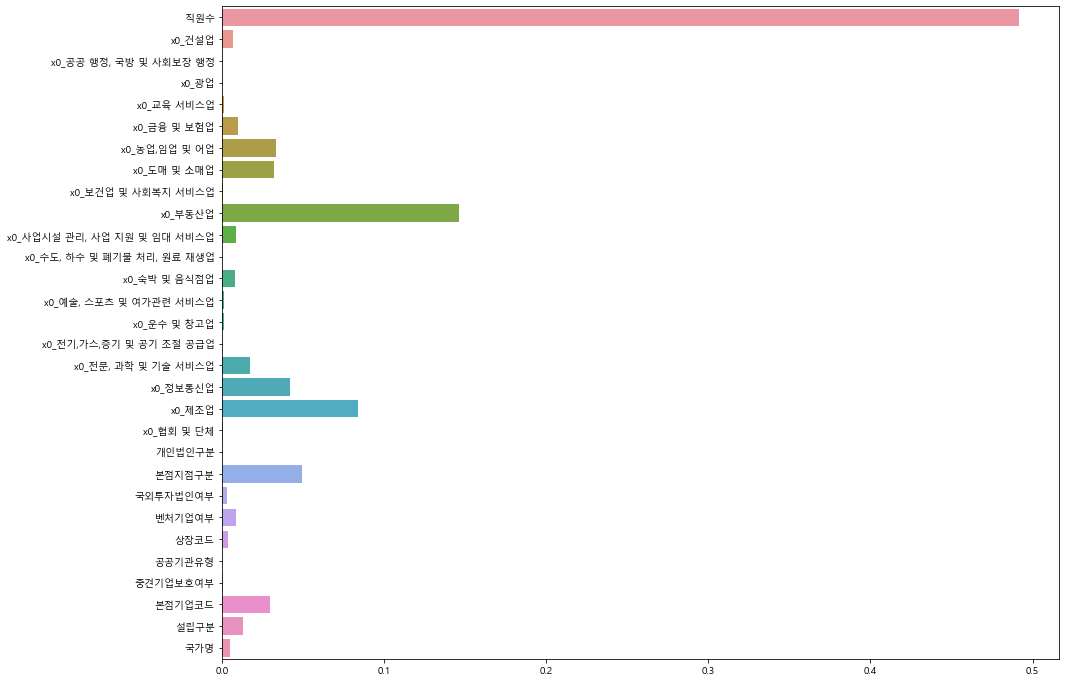

In [46]:
plt.figure(figsize= (15,12))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(y = X_train.columns, x =RFC_best.feature_importances_)
plt.show()